# Weather's affects on crime rate in major cities

### Method 

We write most our function in FUNC.py to test Travis and see the coverage. We import FUCN here to use the function in FUCN, and in this notebook we also have some function that are only useful for part of the analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import add
from sklearn import preprocessing
from statsmodels.formula.api import ols
%matplotlib inline


from datetime import datetime

In [2]:
import FUNC

# Chicago's weather and crimes

In [3]:
def get_city(cityname, citycrime, weather_all):
    '''
    This function is used to get the merged crime data and weather data of the pointed city

    :param cityname: a string of the name of the city
    :param citycrime: the crime data of this city
    :param weather_all: new dataframe merged all weather
    :return: new dataframe
    '''

    city_weather = weather_all[['year', 'month', 'day', cityname, 'indextype']].copy(deep=True)
    citycrime_per_month = citycrime.groupby(['year', 'month', 'day']).size()
    citycrime_per_month = pd.DataFrame(citycrime_per_month.reset_index())
    citycrime_per_month = citycrime_per_month.rename(columns={0: 'Count'})
    citycrime_per_month[['year', 'month', 'day']] = citycrime_per_month[['year', 'month', 'day']].astype(int)

    city_weather[['year', 'month', 'day']] = city_weather[['year', 'month', 'day']].astype(int)

    crime_weather = pd.merge(city_weather[['year', 'month', 'day', cityname, 'indextype']], citycrime_per_month,
                             on=['year', 'month'], how='left')

    crime_weather = crime_weather[(crime_weather.year >= 2012) & (crime_weather.year < 2018)]
    crime_weather = crime_weather.rename(columns={cityname: 'indexvalue'})
    return crime_weather


In [4]:
def mergeall_weather(new_df_list, mergeby):
    """
    This function is used to merge all the updated weather dataframe

    :param new_df_list: updated list of weather dataframe from former step
    :param mergeby: column named referred to merge om
    :return: new dataframe merged all weather
    """
    weather_all = new_df_list[0]
    for i in range(len(new_df_list) - 1):
        weather_all = FUNC.merge_dataframe(weather_all, new_df_list[i + 1], mergeby)
    return weather_all

In [5]:
def get_city_weather(cityname, df_list, stringlist):
    """
    Extract the specific city's weather, including temperature, humidity, wind speed, from the
    weather dataset, specify the corresponding dataset in df_list

    :param cityname: a string of cityname, like "Chicago"
    :param df_list: a list of dataframe
    :param stringlist: a list of the name of these dataframe
    :return: a new list of dataframe, with some information updated

    """
    new_df_list = []
    for i in range(len(stringlist)):
        citydf = df_list[i][(df_list[i].year >= 2012) & (df_list[i].year < 2018)].copy(deep=True)
        citydf = citydf[['year', 'month', 'day', cityname]]
        citydf[['year', 'month', 'day']] = citydf[['year', 'month', 'day']].astype(int)
        citydf = pd.DataFrame(citydf.groupby(['year', 'month', 'day']).mean())
        citydf = citydf.reset_index()
        citydf = citydf.rename(columns={cityname: stringlist[i]})
        new_df_list.append(citydf)
    return new_df_list

In [6]:
###Read data used to prove hypothesis 1

Humiditiy = FUNC.read_indata('./historical-hourly-weather-data/humidity.csv')
Pressure = FUNC.read_indata('./historical-hourly-weather-data/pressure.csv')
Temperature = FUNC.read_indata('./historical-hourly-weather-data/temperature.csv')
chicago_crime = FUNC.read_indata('./Chicago_crime_2012-2017.csv')

In [7]:
## Make a list of weather dataframe, generate year, month, day columns in the weather dataframes 
df_list = [Humiditiy, Pressure, Temperature]
stringlist = ['Humiditiy', 'Pressure', 'Temperature']

for index in range(len(df_list)):
    df = FUNC.generate_year_month_day(df_list[index], 'datetime','day')


In [8]:
Humiditiy.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,year,month,day
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25.0,NaN,NaN,NaN,2012,10,1
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,68.0,50.0,63.0,22.0,51.0,51.0,50.0,2012,10,1
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,68.0,51.0,62.0,22.0,51.0,51.0,50.0,2012,10,1
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,68.0,51.0,62.0,22.0,51.0,51.0,50.0,2012,10,1
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,68.0,52.0,62.0,22.0,51.0,51.0,50.0,2012,10,1


In [9]:
new_df_list = get_city_weather('Chicago', df_list, stringlist)
weather_all = mergeall_weather(new_df_list, ['year', 'month', 'day'])
weather_all.head()

,year,month,day,Humiditiy,Pressure,Temperature
0,2012,10,1,68.909091,1014.000000,284.552669
1,2012,10,2,60.578947,1013.526316,287.713511
2,2012,10,3,53.818182,1010.761905,289.127917
3,2012,10,4,73.000000,1013.318182,290.032500
4,2012,10,5,69.521739,1015.565217,291.207500


In [10]:
chicago_crime['year'] = chicago_crime.Date.str[6:10]
chicago_crime['month'] = chicago_crime.Date.str[0:2]
chicago_crime['day'] = chicago_crime.Date.str[3:5]
chicago_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,year,month,day
0,11002368,JA329407,01/01/2012 12:00:00 AM,021XX N KENNETH AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,NaN,NaN,2012,11/27/2017 03:53:35 PM,NaN,NaN,NaN,2012,01,01
1,9979416,HY169652,01/01/2012 12:00:00 AM,053XX W MONROE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,1140801.0,1899144.0,2012,02/09/2018 03:44:29 PM,41.879335,-87.758468,"(41.879335159, -87.758467514)",2012,01,01
2,10433124,HZ170983,01/01/2012 12:00:00 AM,026XX N MC VICKER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,True,False,...,NaN,NaN,2012,05/11/2016 03:48:18 PM,NaN,NaN,NaN,2012,01,01
3,9888481,HX538405,01/01/2012 12:00:00 AM,066XX S MAY ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,1169793.0,1860812.0,2012,02/09/2018 03:44:29 PM,41.773566,-87.653128,"(41.773566189, -87.653127978)",2012,01,01
4,10593543,HZ344934,01/01/2012 12:00:00 AM,064XX W BELLE PLAINE AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,NaN,NaN,2012,07/12/2016 03:53:40 PM,NaN,NaN,NaN,2012,01,01


In [11]:
chi_crime_per_day = chicago_crime.groupby(['year', 'month', 'day', 'Primary Type', 'Arrest',  'Domestic']).size()
chi_crime_per_day= pd.DataFrame(chi_crime_per_day.reset_index())
chi_crime_per_day = chi_crime_per_day.rename(columns = {0:'Count'})
chi_crime_per_day[['year', 'month', 'day']] = chi_crime_per_day[['year', 'month', 'day']].astype(int)


In [12]:
chi_crime_per_day.head()

,year,month,day,Primary Type,Arrest,Domestic,Count
0,2012,1,1,ARSON,False,False,1
1,2012,1,1,ASSAULT,False,False,23
2,2012,1,1,ASSAULT,False,True,9
3,2012,1,1,ASSAULT,True,False,10
4,2012,1,1,ASSAULT,True,True,6


In [13]:
crime_weather= FUNC.merge_dataframe(weather_all,chi_crime_per_day,['year', 'month', 'day'])
crime_weather = crime_weather.dropna()
crime_weather['Temperature'] = crime_weather['Temperature'] - 273.15

In [14]:
### Merged dataset 
crime_weather.head()

,year,month,day,Humiditiy,Pressure,Temperature,Primary Type,Arrest,Domestic,Count
0,2012,10,1,68.909091,1014.0,11.402669,ARSON,False,False,4
1,2012,10,1,68.909091,1014.0,11.402669,ASSAULT,False,False,33
2,2012,10,1,68.909091,1014.0,11.402669,ASSAULT,False,True,9
3,2012,10,1,68.909091,1014.0,11.402669,ASSAULT,True,False,15
4,2012,10,1,68.909091,1014.0,11.402669,ASSAULT,True,True,3


In [15]:
crime_subset = crime_weather[['year', 'month', 'day','Humiditiy', 'Count','Primary Type']].copy(deep = True)

In [16]:
crime_subset = FUNC.normalize_humidity(crime_subset, 'Humiditiy')
crime_subset.head()

,year,month,day,Humiditiy,Count,Primary Type
0,2012,10,1,0.575067,4,ARSON
1,2012,10,1,0.575067,33,ASSAULT
2,2012,10,1,0.575067,9,ASSAULT
3,2012,10,1,0.575067,15,ASSAULT
4,2012,10,1,0.575067,3,ASSAULT


In [17]:
crime_subset['Reltaive Humidity'] = crime_subset.apply(FUNC.vectorize_humidity, axis = 1)
crime_subset.head()

,year,month,day,Humiditiy,Count,Primary Type,Reltaive Humidity
0,2012,10,1,0.575067,4,ARSON,Normal
1,2012,10,1,0.575067,33,ASSAULT,Normal
2,2012,10,1,0.575067,9,ASSAULT,Normal
3,2012,10,1,0.575067,15,ASSAULT,Normal
4,2012,10,1,0.575067,3,ASSAULT,Normal


In [18]:
crime_count = pd.DataFrame(crime_subset.groupby(['Primary Type','Reltaive Humidity']).agg({'Count':np.sum}))
crime_count_total = crime_count.reset_index()

In [19]:
crime_count_total.head()

,Primary Type,Reltaive Humidity,Count
0,ARSON,High,1001
1,ARSON,Low,411
2,ARSON,Normal,823
3,ASSAULT,High,44198
4,ASSAULT,Low,16292


### Subtitle

In [20]:
Temp_sub = crime_weather[['year', 'month', 'day', 'Temperature', 'Count', 'Primary Type']].copy(deep=True)

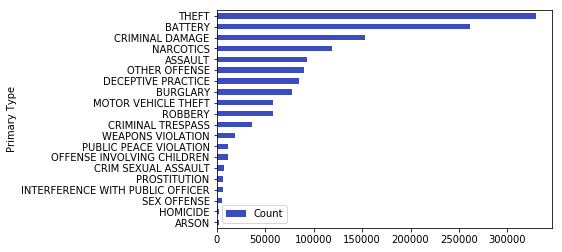

In [21]:
sort_crime_count = pd.DataFrame(Temp_sub.groupby(['Primary Type']).agg({'Count': np.sum}))

sort_crime_count = sort_crime_count.sort_values(by = "Count", ascending = True).tail(20)

sort_crime_count.plot(kind = 'barh',colormap= 'coolwarm')


In [22]:
avg_crime_count_bymonth = pd.DataFrame(Temp_sub.groupby(['Primary Type','month']).agg({'Count': np.sum}))

avg_crime_count_bymonth.head()


#avg_crime_count_byyear = pd.DataFrame(Temp_sub.groupby(['Primary Type','month', 'year']).agg({'Count': np.sum}))
#avg_crime_count_byyear.head(10)

assault_bymonth = avg_crime_count_bymonth.loc['ASSAULT'] / 5

narcotics_bymonth = avg_crime_count_bymonth.loc['NARCOTICS'] / 5

crimesex_bymonth = avg_crime_count_bymonth.loc['CRIM SEXUAL ASSAULT'] / 5
battery_bymonth = avg_crime_count_bymonth.loc['BATTERY'] / 5
theft_bymonth = avg_crime_count_bymonth.loc['THEFT'] / 5

### Mean temperature by month across 2013-2017
Temp_bymonth = Temp_sub.groupby('month').agg({'Temperature':np.mean})
Temp_bymonth.head()


,Temperature
month,
1,-3.341509
2,-3.588281
3,1.982528
4,9.091234
5,14.866458


In [23]:
Temp_sub['Temprange'] = Temp_sub.apply(FUNC.vectorize_temperature, axis=1)

Temp_sub3 = pd.DataFrame(Temp_sub.groupby(['Primary Type','Temprange']).agg({'Count': np.sum}))

asc_temp_sub3 = Temp_sub3.sort_values(by = "Count", ascending = 0)

asc_temp_sub3.head()


Count
Primary Type Temprange       
THEFT        0-5        95265
BATTERY      0-5        73756
THEFT        20-25      69308
             15-20      58250
BATTERY      20-25      56699

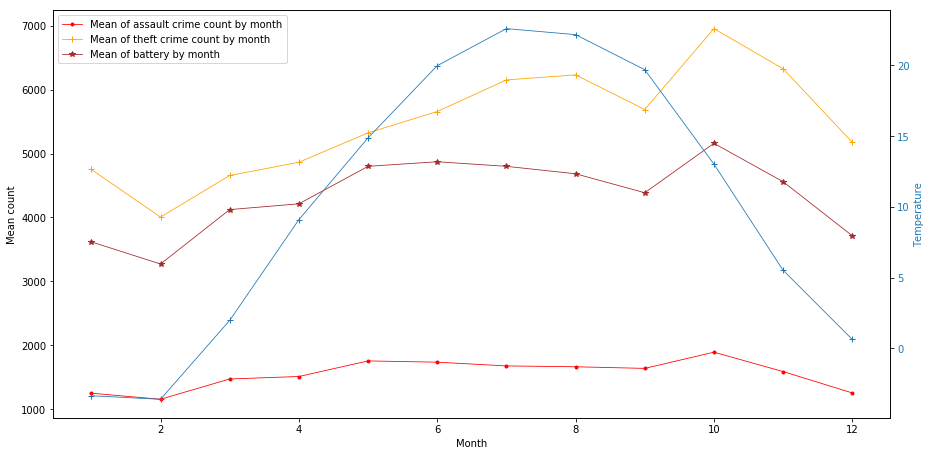

In [24]:
fig, ax1 = plt.subplots(figsize = (15,7.5))

ax1.plot(assault_bymonth , linewidth = 0.8, marker = '.', label = "Mean of assault crime count by month", color='Red')
ax1.plot(theft_bymonth, linewidth = 0.8, marker = '+', label = "Mean of theft crime count by month", color='Orange')
ax1.plot(battery_bymonth, linewidth = 0.8, marker = '*', label = "Mean of battery by month", color='Brown')

ax1.set_xlabel("Month") 
ax1.set_ylabel("Mean count") 
ax1.tick_params(axis='y')
ax1.legend()



ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(Temp_bymonth, linewidth = 0.8, marker = '+', label = "Mean of narcotics crime count by month", color='tab:blue')
ax2.tick_params(axis='y', labelcolor=color)




plt.show()

Describe the plot here 

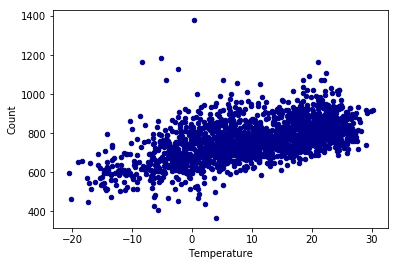

In [25]:
Temp_sub1 = pd.DataFrame(Temp_sub.groupby(['year','month','day']).agg({'Count': np.sum, 'Temperature': np.mean}))
Temp_sub1 = Temp_sub1.reset_index()

ax1 = Temp_sub1.plot.scatter(x='Temperature',y = 'Count',c = 'DarkBlue')
plt.show()

In [26]:
chicago_linear_model = ols("Count ~ Temperature", data=Temp_sub1).fit()
chicago_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     812.3
Date:                Fri, 03 May 2019   Prob (F-statistic):          7.64e-149
Time:                        21:47:12   Log-Likelihood:                -11059.
No. Observations:                1885   AIC:                         2.212e+04
Df Residuals:                    1883   BIC:                         2.213e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     709.6562      2.740    258.960      0.000     704.282     715.031
Temperature     5.3223      0.187     28.500      0.000       4.956       5.689
==============================================================================
Omnibus:                      400.875   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1579.961
Skew:                           0.987   Prob(JB):                         0.00
Kurtosis:                       7.027   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

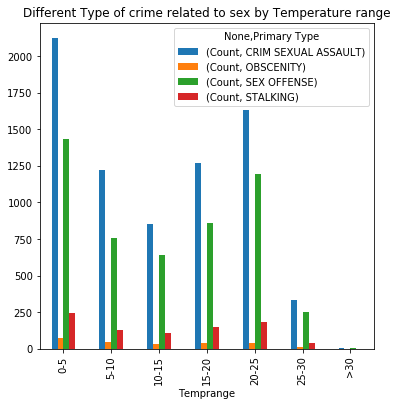

In [27]:
Temp_sub['Temprange'] = Temp_sub.apply(FUNC.vectorize_temperature, axis=1)

Temp_sub.head()

Temp_sexual3 = Temp_sub.loc[Temp_sub['Primary Type'].isin(['CRIM SEXUAL ASSAULT','OBSCENITY', 'SEX OFFENSE','STALKING'])]

Temp_sub3 =Temp_sexual3.groupby(['Temprange','Primary Type']).agg({'Count': np.sum}).unstack()

Temp_sub3 = Temp_sub3.reindex(index = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '>30'])


Temp_sub3
Temp_sub3.plot(kind = 'bar', title = "Different Type of crime related to sex by Temperature range", figsize=(6,6))
plt.xticks(rotation=90)



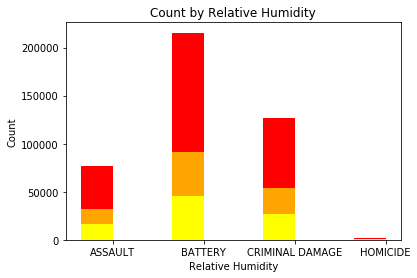

In [28]:
crime_count = crime_count_total.loc[crime_count_total['Primary Type'].isin(['ASSAULT','BATTERY', 'CRIMINAL DAMAGE','HOMICIDE'])]
fig, ax = plt.subplots()
N = len(set(crime_count['Primary Type']))
HighCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'High', 'Count'])
NormalCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'Normal', 'Count'])
LowCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'Low', 'Count'])
ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, LowCounts, width,color='Yellow')
p2 = ax.bar(ind, NormalCounts, width, color='Orange', bottom = LowCounts)
p3 = ax.bar(ind, HighCounts, width, color = 'Red', bottom = NormalCounts)
ax.set_ylabel('Count')
ax.set_xlabel('Relative Humidity')
ax.set_title('Count by Relative Humidity')
ax.set_xticks(ind + width / 2.)
#ax.set_yticks(np.arange(0, 81, 10))
ax.set_xticklabels(('ASSAULT','BATTERY', 'CRIMINAL DAMAGE','HOMICIDE'))
plt.show()

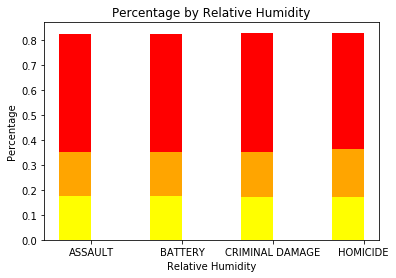

In [29]:
fig, ax = plt.subplots()
N = len(set(crime_count['Primary Type']))
HighCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'High', 'Count'])
NormalCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'Normal', 'Count'])
LowCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'Low', 'Count'])
totalCounts = list(map(sum, zip(HighCounts,NormalCounts,LowCounts)))


Highpercent = [x/y for x, y in zip(HighCounts, totalCounts)]
Normalpercent = [x/y for x, y in zip(NormalCounts, totalCounts)]
Lowpercent = [x/y for x, y in zip(LowCounts, totalCounts)]
ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, Lowpercent, width,color='Yellow')
p2 = ax.bar(ind, Normalpercent, width, color='Orange', bottom = Lowpercent)
p3 = ax.bar(ind, Highpercent, width, color = 'Red', bottom = Normalpercent)
ax.set_ylabel('Percentage')
ax.set_xlabel('Relative Humidity')
ax.set_title('Percentage by Relative Humidity')
ax.set_xticks(ind + width / 2.)
#ax.set_yticks(np.arange(0, 81, 10))
ax.set_xticklabels(('ASSAULT','BATTERY', 'CRIMINAL DAMAGE','HOMICIDE'))
plt.show()

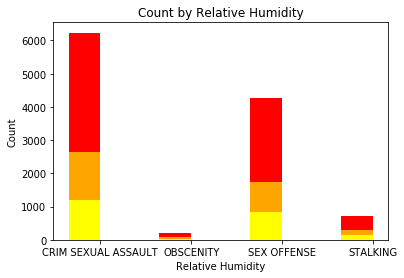

In [30]:
crime_count = crime_count_total.loc[crime_count_total['Primary Type'].isin(['CRIM SEXUAL ASSAULT','OBSCENITY', 'SEX OFFENSE','STALKING'])]
fig, ax = plt.subplots()
N = len(set(crime_count['Primary Type']))
HighCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'High', 'Count'])
NormalCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'Normal', 'Count'])
LowCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'Low', 'Count'])
ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, LowCounts, width,color='Yellow')
p2 = ax.bar(ind, NormalCounts, width, color='Orange', bottom = LowCounts)
p3 = ax.bar(ind, HighCounts, width, color = 'Red', bottom = NormalCounts)
ax.set_ylabel('Count')
ax.set_xlabel('Relative Humidity')
ax.set_title('Count by Relative Humidity')
ax.set_xticks(ind + width / 2.)
ax.set_xticklabels(('CRIM SEXUAL ASSAULT','OBSCENITY', 'SEX OFFENSE','STALKING'))
plt.show()

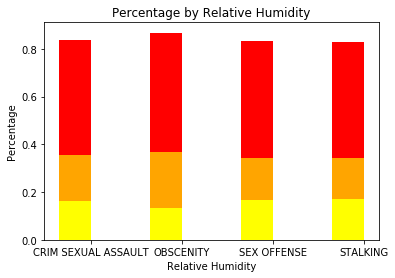

In [31]:
fig, ax = plt.subplots()
N = len(set(crime_count['Primary Type']))
HighCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'High', 'Count'])
NormalCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'Normal', 'Count'])
LowCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'Low', 'Count'])
totalCounts = list(map(sum, zip(HighCounts,NormalCounts,LowCounts)))


Highpercent = [x/y for x, y in zip(HighCounts, totalCounts)]
Normalpercent = [x/y for x, y in zip(NormalCounts, totalCounts)]
Lowpercent = [x/y for x, y in zip(LowCounts, totalCounts)]
ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, Lowpercent, width,color='Yellow')
p2 = ax.bar(ind, Normalpercent, width, color='Orange', bottom = Lowpercent)
p3 = ax.bar(ind, Highpercent, width, color = 'Red', bottom = Normalpercent)
ax.set_ylabel('Percentage')
ax.set_xlabel('Relative Humidity')
ax.set_title('Percentage by Relative Humidity')
ax.set_xticks(ind + width / 2.)
#ax.set_yticks(np.arange(0, 81, 10))
ax.set_xticklabels(('CRIM SEXUAL ASSAULT','OBSCENITY', 'SEX OFFENSE','STALKING'))
plt.show()

# Los Angeles's temperature and crimes

We first extract and compute the monthly crime count and monthly average temperature in LA to draw a line plot through 2012-10 to 2017-10, by drawing this plot, we can have a view of how the crime count and temperature changed between monthes. Here we mainly used pandas to process dataframe and use plot function to draw plots.

In [32]:
LA_crime =FUNC.read_indata('./LA_Crime_Data_2010_to_Present.csv')
LA_crime.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,61000673,04/07/2016,04/07/2016,2043,10,West Valley,1037,886,DISTURBING THE PEACE,1501,...,NaN,IC,Invest Cont,886.0,NaN,NaN,NaN,17100 VANOWEN ST,NaN,"(34.1939, -118.5055)"
1,131609876,04/02/2016,04/01/2016,1900,19,Mission,1902,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,...,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,13600 DRONEFIELD AV,NaN,"(34.3196, -118.4561)"
2,150319258,08/20/2016,08/20/2016,30,3,Southwest,325,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,NaN,AO,Adult Other,440.0,NaN,NaN,NaN,2800 MENLO AV,NaN,"(34.0294, -118.2903)"
3,151601466,01/01/2016,01/01/2016,2040,16,Foothill,1642,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0334 0411 1402,...,OTHER KNIFE,AA,Adult Arrest,230.0,998.0,NaN,NaN,10500 CAYUGA AV,NaN,"(34.2606, -118.4238)"
4,151601467,01/02/2016,01/02/2016,30,16,Foothill,1668,624,BATTERY - SIMPLE ASSAULT,0416,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,9800 MARCUS AV,NaN,"(34.2463, -118.2818)"


In [33]:
LA_monthly_crime=FUNC.crime_count(LA_crime,'Date Occurred','month')
LA_monthly_crime.head()

count
year month       
2012 1      17745
     2      15316
     3      16562
     4      16275
     5      17466

In [34]:
LA_temp=FUNC.city_temp_Celsius(Temperature,'Los Angeles')
LA_temp.head()

C:\Users\yiwen\PycharmProjects\Final_Project\FUNC.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  city_temp[city]=city_temp[city]-273.5


,Los Angeles,year,month,day
0,NaN,2012,10,1
1,18.370000,2012,10,1
2,18.368186,2012,10,1
3,18.362844,2012,10,1
4,18.357503,2012,10,1


In [35]:
LA_temp_avg_month=FUNC.average_temp(LA_temp,'Los Angeles','month')
LA_temp_avg_month.head()

,year,month,mean_temp
0,2012,10,19.755154
1,2012,11,15.776347
2,2012,12,12.739209
3,2013,1,11.242942
4,2013,2,12.234333


In [36]:
LA_crime_weather_month= FUNC.merge_dataframe(LA_monthly_crime,LA_temp_avg_month,['year', 'month'])
LA_crime_weather_month=LA_crime_weather_month.dropna()
LA_crime_weather_month['year_month']=LA_crime_weather_month['year'].astype(str)+'-'+LA_crime_weather_month['month'].astype(str)
LA_crime_weather_month.head()

,year,month,count,mean_temp,year_month
9,2012,10,17207,19.755154,2012-10
10,2012,11,15750,15.776347,2012-11
11,2012,12,16270,12.739209,2012-12
12,2013,1,16623,11.242942,2013-1
13,2013,2,14037,12.234333,2013-2


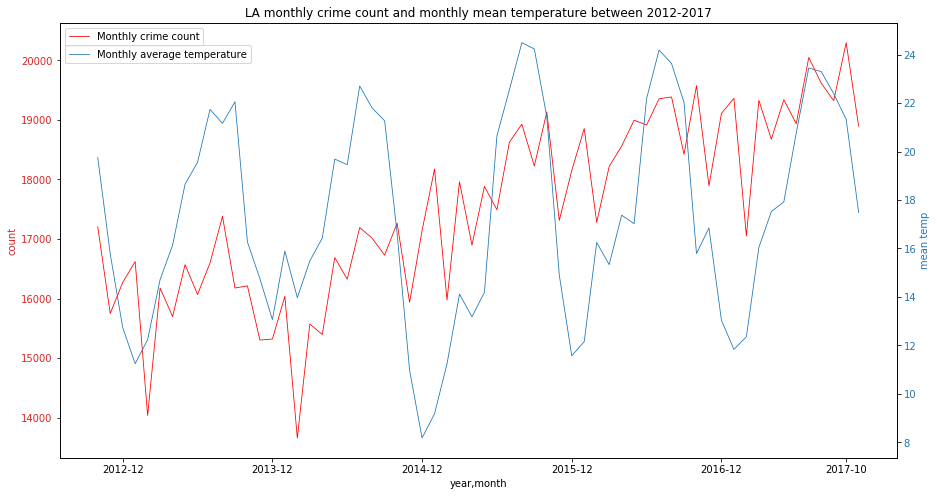

In [37]:
fig, ax1 = plt.subplots(figsize = (15,8))
color = 'tab:red'
ax1.set_xlabel('year,month')
ax1.set_ylabel('count', color=color)
ax1.plot(LA_crime_weather_month['year_month'], LA_crime_weather_month['count'], linewidth = 0.8,label = "Monthly crime count", color='Red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('mean temp', color=color)  
ax2.plot(LA_crime_weather_month['year_month'], LA_crime_weather_month['mean_temp'],linewidth = 0.8,label = "Monthly average temperature",color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('LA monthly crime count and monthly mean temperature between 2012-2017')
ax1.legend()
ax2.legend(bbox_to_anchor=(0.234,0.96))

plt.xticks(['2012-12','2013-12','2014-12','2015-12','2016-12','2017-10'])
plt.show()


Compare the line plot of monthly crime numbers and monthly average temperature. The x-axis represents the month and year, the left y-axis represents the total crime number in that month, the right y-axis represents the average temperature in that month. From the plot we can see the fluctuation of the crime count and the temperature are parellel in some parts, so we assume there might be some connections betweeen the crime count and the temperature in LA. While from the line plot we can't see the connection very clearly, we need a futher analysis.  

Use the daily crime count and daily temperature to draw a scatter plot.

In [38]:
LA_temp_avg_day=FUNC.average_temp(LA_temp,'Los Angeles','day')
LA_temp_avg_day.head()

,year,month,day,mean_temp
0,2012,10,1,18.346501
1,2012,10,2,22.390450
2,2012,10,3,25.508542
3,2012,10,4,22.497917
4,2012,10,5,19.448333


In [39]:
LA_daily_crime=FUNC.crime_count(LA_crime,'Date Occurred','day')
LA_daily_crime.head()

count
year month day       
2012 1     1     1742
           2      476
           3      554
           4      530
           5      519

In [40]:
LA_crime_weather_day=pd.merge(LA_daily_crime, LA_temp_avg_day,on=['year', 'month','day'])
LA_crime_weather_day.head()

,year,month,day,count,mean_temp
0,2012,10,1,872,18.346501
1,2012,10,2,547,22.390450
2,2012,10,3,546,25.508542
3,2012,10,4,498,22.497917
4,2012,10,5,625,19.448333


The correlation table shows the count and the mean_temp has some positive relations, while the relation is not very significant.

In [41]:
LA_crime_weather_day[['count','mean_temp']].corr() 

,count,mean_temp
count,1.000000,0.180641
mean_temp,0.180641,1.000000


Text(0, 0.5, 'daily crime')

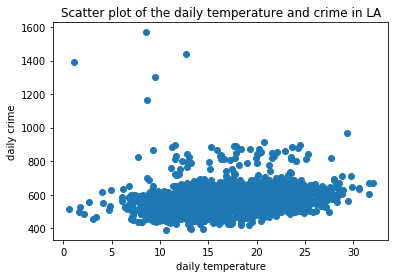

In [42]:
plt.scatter(LA_crime_weather_day['mean_temp'], LA_crime_weather_day['count'])
plt.title('Scatter plot of the daily temperature and crime in LA')
plt.xlabel('daily temperature')
plt.ylabel('daily crime')

Apply a linear analysis on the daily crime count and daily temperature between 2010-10 to 2017-10. From the results we can see that the P-value is very small. 

In [43]:
LA_temp_linear_model = ols("count ~ mean_temp", data=LA_crime_weather_day).fit()
LA_temp_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     63.58
Date:                Fri, 03 May 2019   Prob (F-statistic):           2.64e-15
Time:                        21:47:44   Log-Likelihood:                -11037.
No. Observations:                1887   AIC:                         2.208e+04
Df Residuals:                    1885   BIC:                         2.209e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    521.9858      7.023     74.326      0.000     508.212     535.759
mean_temp      3.1033      0.389      7.974      0.000       2.340       3.867
==============================================================================
Omnibus:                     1543.782   Durbin-Watson:                   1.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72245.636
Skew:                           3.494   Prob(JB):                         0.00
Kurtosis:                      32.497   Cond. No.                         65.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# New York City's temperature and crimes

We apply the same analysis on New York.

In [44]:
NY_crime=FUNC.read_indata('./NYPD_Complaint_Data_Historic.csv')
NY_crime.head()

C:\Program Files\Python37\lib\site-packages\IPython\core\interactiveshell.py:2809: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,789626784,04/24/2015,00:01:00,NaN,NaN,105.0,04/27/2015,578,HARRASSMENT 2,638.0,...,F,NaN,40.660029,-73.739577,"(40.660028593, -73.739576566)",PATROL BORO QUEENS SOUTH,NaN,25-44,BLACK,F
1,939665334,04/23/2015,22:00:00,04/23/2015,22:10:00,13.0,04/27/2015,109,GRAND LARCENY,418.0,...,NaN,NaN,40.733933,-73.977327,"(40.73393308, -73.977326958)",PATROL BORO MAN SOUTH,NaN,45-64,UNKNOWN,F
2,414873301,04/23/2015,21:35:00,04/24/2015,13:59:00,73.0,04/27/2015,109,GRAND LARCENY,422.0,...,NaN,NaN,40.673844,-73.916732,"(40.673844225, -73.916732256)",PATROL BORO BKLYN NORTH,NaN,25-44,WHITE,F
3,879233701,04/23/2015,19:45:00,NaN,NaN,43.0,04/27/2015,341,PETIT LARCENY,338.0,...,U,NaN,40.823500,-73.858619,"(40.823499964, -73.858618987)",PATROL BORO BRONX,NaN,NaN,UNKNOWN,D
4,236156807,04/23/2015,19:21:00,04/25/2015,20:08:00,34.0,04/27/2015,126,MISCELLANEOUS PENAL LAW,198.0,...,M,NaN,40.851112,-73.935256,"(40.851111636, -73.935255912)",PATROL BORO MAN NORTH,NaN,25-44,BLACK,F


In [45]:
NY_monthly_crime=FUNC.crime_count(NY_crime, 'RPT_DT','month')
NY_monthly_crime.head()

count
year month       
2012 1      41569
     2      39248
     3      43539
     4      41721
     5      44949

In [46]:
NY_temp=FUNC.city_temp_Celsius(Temperature,'New York')
NY_temp.head()

C:\Users\yiwen\PycharmProjects\Final_Project\FUNC.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  city_temp[city]=city_temp[city]-273.5


,New York,year,month,day
0,NaN,2012,10,1
1,14.720000,2012,10,1
2,14.747676,2012,10,1
3,14.826940,2012,10,1
4,14.906203,2012,10,1


In [47]:
NY_monthly_avg_temp=FUNC.average_temp(NY_temp,'New York','month')
NY_monthly_avg_temp.head()

,year,month,mean_temp
0,2012,10,14.040227
1,2012,11,5.595819
2,2012,12,4.322878
3,2013,1,0.776306
4,2013,2,0.262894


In [48]:
NY_crime_weather_monthly= FUNC.merge_dataframe(NY_monthly_crime,NY_monthly_avg_temp,['year', 'month'])
NY_crime_weather_monthly=NY_crime_weather_monthly.dropna()
NY_crime_weather_monthly.head()

,year,month,count,mean_temp
9,2012,10,41908,14.040227
10,2012,11,35491,5.595819
11,2012,12,38897,4.322878
12,2013,1,40357,0.776306
13,2013,2,35364,0.262894


In [49]:
NY_crime_weather_monthly['year_month']=NY_crime_weather_monthly['year'].astype(str)+'-'+NY_crime_weather_monthly['month'].astype(str)
NY_crime_weather_monthly.head()

,year,month,count,mean_temp,year_month
9,2012,10,41908,14.040227,2012-10
10,2012,11,35491,5.595819,2012-11
11,2012,12,38897,4.322878,2012-12
12,2013,1,40357,0.776306,2013-1
13,2013,2,35364,0.262894,2013-2


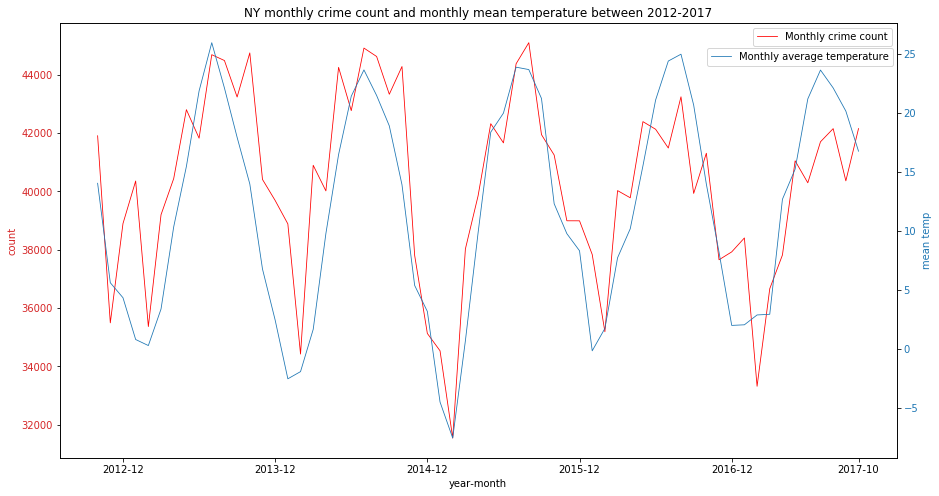

In [50]:
fig, ax1 = plt.subplots(figsize = (15,8))
color = 'tab:red'
ax1.set_xlabel('year-month')
ax1.set_ylabel('count', color=color)
ax1.plot(NY_crime_weather_monthly['year_month'], NY_crime_weather_monthly['count'], linewidth = 0.8,label = "Monthly crime count", color='Red')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('mean temp', color=color)  
ax2.plot(NY_crime_weather_monthly['year_month'], NY_crime_weather_monthly['mean_temp'],linewidth = 0.8,label = "Monthly average temperature",color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(['2012-12','2013-12','2014-12','2015-12','2016-12','2017-10'])
plt.title('NY monthly crime count and monthly mean temperature between 2012-2017')
ax1.legend()
ax2.legend(bbox_to_anchor=(0.768,0.89))

plt.show()

From this plot we can see the crime count and temperaturethe almost have the same pace of fluctuation, we assume that there might be a strong relationship between crime count and temperature in New York.

In [51]:
NY_daily_crime=FUNC.crime_count(NY_crime, 'RPT_DT','day')
NY_daily_crime.head()

count
year month day       
2012 1     1     1312
           2     1085
           3     1318
           4     1276
           5     1425

In [52]:
NY_daily_temp=FUNC.average_temp(NY_temp,'New York','day')
NY_daily_temp.head()

,year,month,day,mean_temp
0,2012,10,1,15.069420
1,2012,10,2,17.392389
2,2012,10,3,16.565625
3,2012,10,4,18.487083
4,2012,10,5,20.543542


In [53]:
NY_crime_weather_day=pd.merge(NY_daily_crime, NY_daily_temp,on=['year', 'month','day'])
NY_crime_weather_day.head()

,year,month,day,count,mean_temp
0,2012,10,1,1327,15.069420
1,2012,10,2,1419,17.392389
2,2012,10,3,1553,16.565625
3,2012,10,4,1599,18.487083
4,2012,10,5,1601,20.543542


In [54]:
NY_crime_weather_day[['count','mean_temp']].corr() 

,count,mean_temp
count,1.000000,0.515759
mean_temp,0.515759,1.000000


Text(0, 0.5, 'daily crime')

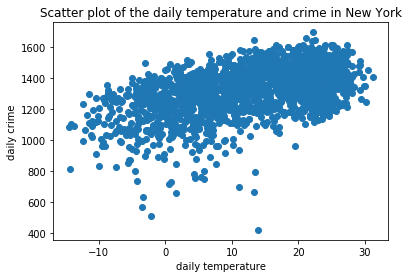

In [55]:
plt.scatter(NY_crime_weather_day['mean_temp'], NY_crime_weather_day['count'])
plt.title('Scatter plot of the daily temperature and crime in New York')
plt.xlabel('daily temperature')
plt.ylabel('daily crime')

In [56]:
NY_temp_linear_model = ols("count ~ mean_temp", data=NY_crime_weather_day).fit()
NY_temp_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     671.2
Date:                Fri, 03 May 2019   Prob (F-statistic):          1.53e-126
Time:                        21:49:18   Log-Likelihood:                -11733.
No. Observations:                1854   AIC:                         2.347e+04
Df Residuals:                    1852   BIC:                         2.348e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1222.9794      4.978    245.666      0.000    1213.216    1232.743
mean_temp      8.3894      0.324     25.907      0.000       7.754       9.025
==============================================================================
Omnibus:                      332.624   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.005
Skew:                          -0.993   Prob(JB):                    1.27e-171
Kurtosis:                       5.498   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the correlation table and the regression results we can see that there is a pretty strong positive relation between crime count and temperature in New York. We can thus conclude that the higher temperature is, the more crime New York tend to have.

# Temperature and crime type

Here we explore the temperature's impact on different kind of crime types. We first normalize the the crime category, then use the crime data after normalization to compute the monthly count of each kind of crime. Then use this crime data to merge with the monthly temperature data.

In [59]:
#normalize the crime category in each city
Chicago_crime_withtype = FUNC.normalize_crime_type(chicago_crime, 'Primary Type')
LA_crime_withtype = FUNC.normalize_crime_type(LA_crime, 'Crime Code Description')
NYC_crime_withtype = FUNC.normalize_crime_type(NY_crime, 'OFNS_DESC')

In [63]:
Chicago_crime_per_type = FUNC.crime_count(Chicago_crime_withtype, 'Date', 'type').unstack(level=2).fillna(0)
Chicago_crime_per_type.head()

count                                                            \
type       ASSAULT BURGLARY DECEPTIVE  DRUG HOMICIDE OFFENSES OTHERS ROBBERY   
year month                                                                     
2012 1        5747     1757      1125  3271       40     2039    194    1011   
     2        5402     1398      1002  3581       27     1909    198     696   
     3        7252     1638      1081  3542       53     1950    267     845   
     4        6453     1646      1082  3027       39     1825    173     975   
     5        7917     1924      1079  3068       50     1957    137    1267   

                                      
type       THEFT VANDALISM VIOLATION  
year month                            
2012 1      7153      2699      1229  
     2      6038      2373      1245  
     3      7292      3184      1457  
     4      7525      3129      1304  
     5      7928      3313      1448

In [73]:
chicago_temp=Temperature[['year','month','day','Chicago']]
chicago_temp=FUNC.average_temp(chicago_temp,'Chicago','month')
chicago_temp.head()

,year,month,mean_temp
0,2012,10,284.627857
1,2012,11,278.333361
2,2012,12,276.366259
3,2013,1,271.189405
4,2013,2,270.443026


Use the correlation table to have a look at weather's relation with different kind of crimes.

In [74]:
Chicago_crimetype_temp = pd.merge(Chicago_crime_per_type,chicago_temp,on=['year','month'])
Chicago_crimetype_temp.corr().tail(1)

C:\Program Files\Python37\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,year,month,"(count, ASSAULT)","(count, BURGLARY)","(count, DECEPTIVE)","(count, DRUG)","(count, HOMICIDE)","(count, OFFENSES)","(count, OTHERS)","(count, ROBBERY)","(count, THEFT)","(count, VANDALISM)","(count, VIOLATION)",mean_temp
mean_temp,0.128192,0.336036,0.870783,0.256102,0.111483,-0.081543,0.604528,0.403934,0.045813,0.407738,0.647145,0.791839,0.606894,1.0


In [80]:
Chicago_crimetype_temp = pd.merge(Chicago_crime_per_type['count'][['THEFT', 'ASSAULT','VANDALISM']],chicago_temp,on=['year','month'])
Chicago_crimetype_temp=Chicago_crimetype_temp[['THEFT', 'ASSAULT','VANDALISM','mean_temp']]
Chicago_crimetype_temp.head()

,THEFT,ASSAULT,VANDALISM,mean_temp
0,7776,6601,2956,284.627857
1,7497,5792,2769,278.333361
2,7279,5659,2735,276.366259
3,6935,5474,2531,271.189405
4,5792,4786,1895,270.443026


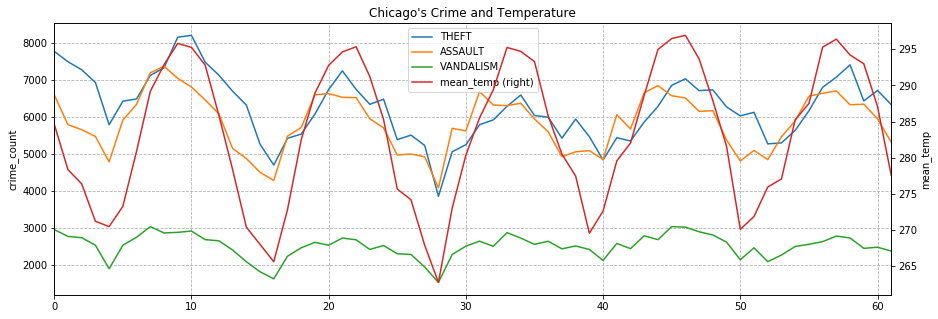

In [83]:
ax = Chicago_crimetype_temp.plot(secondary_y=['mean_temp'],grid=True,figsize=(15,5))
ax.set_title("Chicago's Crime and Temperature")
ax.set_ylabel('crime_count')
ax.grid(linestyle="--", alpha=3)
ax.right_ax.set_ylabel('mean_temp')
plt.show()

From this table we can see that the fluctuation of the temperature and the fluctuation of the count of theft, assault, vandalism are almost in the same pace, we can assume that these kind of crimes are more influenced by the temperature in Chicago.

Use the same method to analysis LA and New York.

In [85]:
LA_crime_per_type = FUNC.crime_count(LA_crime_withtype, 'Date Occurred', 'type').unstack(level=2).fillna(0)
LA_crime_per_type.head()

count                                                \
type       ABORTION/ILLEGAL ASSAULT BIGAMY BLOCKING DOOR INDUCTION CENTER   
year month                                                                  
2012 1                  0.0  3312.0    1.0                            0.0   
     2                  0.0  3101.0    0.0                            0.0   
     3                  0.0  3395.0    0.0                            0.0   
     4                  0.0  3451.0    1.0                            0.0   
     5                  0.0  3932.0    0.0                            0.0   

                                                                    ...  \
type       BRIBERY BURGLARY CONSPIRACY CONTRIBUTING DECEPTIVE DRUG  ...   
year month                                                          ...   
2012 1         0.0   3040.0        0.0          1.0      22.0  0.0  ...   
     2         1.0   2480.0        0.0          1.0      13.0  0.0  ...   
     3         0.0   2720.0        1.0          0.0      24.0  0.0  ...   
     4         1.0   2616.0        0.0          6.0      15.0  0.0  ...   
     5         1.0   2782.0        1.0          4.0      14.0  0.0  ...   

                                                                              \
type       HOMICIDE INCITING A RIOT LYNCHING OFFENSES OTHERS ROBBERY   THEFT   
year month                                                                     
2012 1         39.0             0.0      1.0    578.0  738.0   747.0  6741.0   
     2         19.0             0.0      3.0    616.0  509.0   607.0  5643.0   
     3         18.0             0.0      0.0    575.0  583.0   766.0  5921.0   
     4         24.0             0.0      1.0    633.0  518.0   706.0  5809.0   
     5         24.0             0.0      0.0    691.0  527.0   788.0  6107.0   

                                                                
type       TILL TAP - PETTY ($950 & UNDER) VANDALISM VIOLATION  
year month                                                      
2012 1                                 1.0    1639.0     885.0  
     2                                 0.0    1473.0     850.0  
     3                                 1.0    1625.0     933.0  
     4                                 0.0    1577.0     917.0  
     5                                 1.0    1698.0     895.0  

[5 rows x 22 columns]

In [92]:
LA_temp_avg_month.head()

,year,month,mean_temp
0,2012,10,19.755154
1,2012,11,15.776347
2,2012,12,12.739209
3,2013,1,11.242942
4,2013,2,12.234333


In [93]:
LA_crimetype_temp = pd.merge(LA_crime_per_type,LA_temp_avg_month,on=['year','month'])
LA_crimetype_temp.corr().tail(1)

C:\Program Files\Python37\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,year,month,"(count, ABORTION/ILLEGAL)","(count, ASSAULT)","(count, BIGAMY)","(count, BLOCKING DOOR INDUCTION CENTER)","(count, BRIBERY)","(count, BURGLARY)","(count, CONSPIRACY)","(count, CONTRIBUTING)",...,"(count, INCITING A RIOT)","(count, LYNCHING)","(count, OFFENSES)","(count, OTHERS)","(count, ROBBERY)","(count, THEFT)","(count, TILL TAP - PETTY ($950 & UNDER))","(count, VANDALISM)","(count, VIOLATION)",mean_temp
mean_temp,0.163786,0.232936,0.002084,0.618453,0.130073,0.084397,-0.122243,-0.063027,-0.082496,-0.075615,...,0.13756,-0.174239,0.540525,0.032599,0.370773,0.145669,0.072251,0.465507,0.435063,1.0


In [94]:
LA_crimetype_temp = pd.merge(LA_crime_per_type['count'][['THEFT', 'OFFENSES','VANDALISM']],LA_temp_avg_month,on=['year','month'])
LA_crimetype_temp=LA_crimetype_temp[['THEFT', 'OFFENSES','VANDALISM','mean_temp']]
LA_crimetype_temp.head()

,THEFT,OFFENSES,VANDALISM,mean_temp
0,6448.0,647.0,1591.0,19.755154
1,6011.0,521.0,1384.0,15.776347
2,6189.0,520.0,1513.0,12.739209
3,6562.0,555.0,1501.0,11.242942
4,5290.0,471.0,1333.0,12.234333


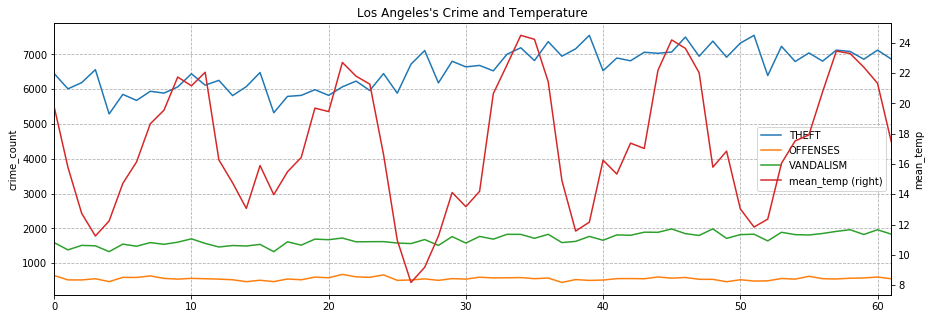

In [95]:
ax = LA_crimetype_temp.plot(secondary_y=['mean_temp'],grid=True,figsize=(15,5))
ax.set_title("Los Angeles's Crime and Temperature")
ax.set_ylabel('crime_count')
ax.grid(linestyle="--", alpha=3)
ax.right_ax.set_ylabel('mean_temp')
plt.show()

From the plot we can see the temperature's fluctuation and the crimes' fluctuation are not synchronous, the temperature's impact on these crimes is not that significant in LA.

In [97]:
NYC_crime_per_type = FUNC.crime_count(NYC_crime_withtype, 'RPT_DT', 'type').unstack(level=2).fillna(0)
NYC_crime_per_type.head()

count                                                          \
type       ABORTION ASSAULT BURGLARY DECEPTIVE    DRUG ENDAN WELFARE INCOMP   
year month                                                                    
2012 1          0.0  5547.0   1674.0     656.0  3325.0                  1.0   
     2          0.0  5581.0   1375.0     761.0  3151.0                  2.0   
     3          0.0  6528.0   1395.0     777.0  3369.0                  0.0   
     4          0.0  6383.0   1432.0     754.0  3004.0                  4.0   
     5          0.0  7035.0   1643.0     719.0  3182.0                  3.0   

                                                                       \
type       FORTUNE TELLING HOMICIDE OFFENSES  OTHERS ROBBERY    THEFT   
year month                                                              
2012 1                 0.0     37.0  12500.0  1614.0  1736.0  11309.0   
     2                 0.0     30.0  11550.0  1554.0  1360.0  10700.0   
     3                 0.0     40.0  13268.0  1823.0  1478.0  11659.0   
     4                 0.0     37.0  12525.0  1716.0  1475.0  11344.0   
     5                 0.0     37.0  13215.0  1801.0  1741.0  12558.0   

                                
type       VANDALISM VIOLATION  
year month                      
2012 1         634.0    2398.0  
     2         675.0    2362.0  
     3         712.0    2319.0  
     4         695.0    2198.0  
     5         638.0    2210.0

In [100]:
NY_monthly_avg_temp.head()

,year,month,mean_temp
0,2012,10,14.040227
1,2012,11,5.595819
2,2012,12,4.322878
3,2013,1,0.776306
4,2013,2,0.262894


In [101]:
NYC_crimetype_temp = pd.merge(NYC_crime_per_type,NY_monthly_avg_temp,on=['year','month'])
NYC_crimetype_temp.corr().tail(1)

C:\Program Files\Python37\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,year,month,"(count, ABORTION)","(count, ASSAULT)","(count, BURGLARY)","(count, DECEPTIVE)","(count, DRUG)","(count, ENDAN WELFARE INCOMP)","(count, FORTUNE TELLING)","(count, HOMICIDE)","(count, OFFENSES)","(count, OTHERS)","(count, ROBBERY)","(count, THEFT)","(count, VANDALISM)","(count, VIOLATION)",mean_temp
mean_temp,0.119738,0.365622,0.205625,0.890457,0.132639,0.012218,0.191708,0.133908,0.117539,0.446156,0.801338,0.720048,0.230212,0.796312,-0.185353,0.213037,1.0


In [124]:
NYC_crimetype_temp = pd.merge(NYC_crime_per_type['count'],NY_monthly_avg_temp,on=['year','month'])
NYC_crimetype_temp=NYC_crimetype_temp[['ASSAULT','OFFENSES','THEFT','mean_temp']]
NYC_crimetype_temp.head()

,ASSAULT,OFFENSES,THEFT,mean_temp
0,6040.0,11970.0,12083.0,14.040227
1,5280.0,9896.0,10901.0,5.595819
2,5643.0,10809.0,12104.0,4.322878
3,5654.0,11833.0,11622.0,0.776306
4,5132.0,10640.0,9769.0,0.262894


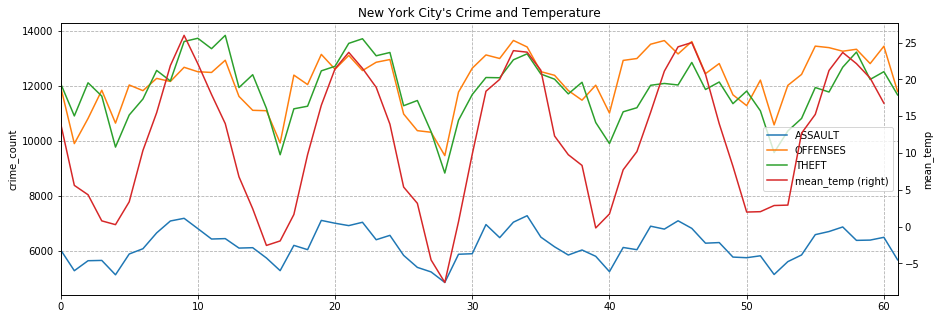

In [125]:
ax = NYC_crimetype_temp.plot(secondary_y=['mean_temp'],grid=True,figsize=(15,5))
ax.set_title("New York City's Crime and Temperature")
ax.set_ylabel('crime_count')
ax.grid(linestyle="--", alpha=3)
ax.right_ax.set_ylabel('mean_temp')
plt.show()

From this plot we can see that the fluctuation of the temperature and fluctuation of the count of theft, offenses, assault are almost in the same pace, and the correlation table also shows that these kind of crime are the crimes that more related with temperature.